In [1]:
using Distributions, Gadfly
set_default_plot_size(24cm, 16cm)

In [2]:
k = 10
qn = Normal(0, 10)
qa = rand(qn, k)
bandits = map(q -> Normal(q, 10), qa)

10-element Array{Distributions.Normal,1}:
 Distributions.Normal(μ=7.430441823426013, σ=10.0)  
 Distributions.Normal(μ=-5.633093756800101, σ=10.0) 
 Distributions.Normal(μ=-8.37548974893205, σ=10.0)  
 Distributions.Normal(μ=-3.7396629656673843, σ=10.0)
 Distributions.Normal(μ=11.011847761548985, σ=10.0) 
 Distributions.Normal(μ=-2.238416465858843, σ=10.0) 
 Distributions.Normal(μ=9.977119913431853, σ=10.0)  
 Distributions.Normal(μ=-4.581713401847906, σ=10.0) 
 Distributions.Normal(μ=-3.950822883743342, σ=10.0) 
 Distributions.Normal(μ=-16.895715196255058, σ=10.0)

In [3]:
μ_star, a_star = findmax(qa)

(11.011847761548985,5)

In [4]:
bandit(a) = rand(bandits[a])

bandit (generic function with 1 method)

In [5]:
bandit(a_star)

5.06910066793003

In [6]:
function ϵgreedy(ϵ, T = 1000)
    R = zeros(Float64, T)
    A = Array(Int, T)

    Q = zeros(Float64, k)
    N = zeros(Int, k)

    xx = Bernoulli(ϵ)
    xa = DiscreteUniform(1, k)
    
    exploit() = indmax(Q) # TODO breaking ties randomly
    explore() = rand(xa)

    for t=1:T
        a = rand(xx) == 0 ? exploit() : explore()
        r = bandit(a)

        N[a] = N[a] + 1
        Q[a] = Q[a] + 1/N[a] * (r - Q[a])

        R[t] = r
        A[t] = a
    end
    
    (A, R)
end

ϵgreedy (generic function with 2 methods)

In [7]:
A_greedy, R_greedy = ϵgreedy(0)
string("Greedy: action = ", A_greedy[end], ", total reward = ", sum(R_greedy))

"Greedy: action = 5, total reward = 11400.158301084135"

In [8]:
hist(A_greedy, 0:k)[2]

10-element Array{Int64,1}:
   1
   1
   1
   1
 996
   0
   0
   0
   0
   0

In [9]:
A_ϵgreedy, R_ϵgreedy = ϵgreedy(0.1)
string("ϵ-Greedy [ϵ = 0.1]: action = ", A_ϵgreedy[end], ", total reward = ", sum(R_ϵgreedy))

"ϵ-Greedy [ϵ = 0.1]: action = 5, total reward = 9058.734446276705"

In [10]:
hist(A_ϵgreedy, 0:k)[2]

10-element Array{Int64,1}:
  10
   9
  19
  17
 816
   5
 102
   9
   6
   7

In [11]:
A_ϵgreedy001, R_ϵgreedy001 = ϵgreedy(0.01)
string("ϵ-Greedy [ϵ = 0.01]: action = ", A_ϵgreedy001[end], ", total reward = ", sum(R_ϵgreedy001))

"ϵ-Greedy [ϵ = 0.01]: action = 1, total reward = 7336.4147555077725"

In [12]:
hist(A_ϵgreedy001, 0:k)[2]

10-element Array{Int64,1}:
 991
   0
   0
   1
   0
   2
   0
   1
   5
   0

In [13]:
R_greedy_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0)
    R_greedy_avg += R
end

R_greedy_avg /= 2000

1000-element Array{Float64,1}:
 7.33605
 4.43785
 3.08006
 3.24822
 4.25549
 5.05909
 6.61343
 6.69398
 7.27613
 7.52306
 7.85497
 7.66704
 7.68696
 ⋮      
 8.25818
 8.64737
 8.56195
 8.95734
 8.63793
 8.45201
 8.65299
 9.08459
 8.56145
 8.18905
 8.37972
 8.77563

In [14]:
R_ϵgreedy_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0.1)
    R_ϵgreedy_avg += R
end

R_ϵgreedy_avg /= 2000

1000-element Array{Float64,1}:
 6.47793
 3.90569
 3.37135
 3.00546
 4.34819
 4.65006
 5.93415
 5.54564
 5.967  
 6.4264 
 6.86424
 6.71455
 6.67499
 ⋮      
 9.38561
 9.9037 
 9.3035 
 9.49755
 9.30196
 9.37039
 9.41389
 9.76734
 9.72554
 9.41416
 9.47699
 9.11298

In [15]:
R_ϵgreedy001_avg = zeros(Float64, 1000)

for n=1:2000
    _, R = ϵgreedy(0.01)
    R_ϵgreedy001_avg += R
end

R_ϵgreedy001_avg /= 2000

1000-element Array{Float64,1}:
 6.90873
 4.63059
 3.24028
 3.32432
 4.809  
 5.50768
 6.3193 
 6.73483
 6.95951
 7.50574
 7.9252 
 7.84049
 7.89423
 ⋮      
 9.70171
 9.45153
 9.52366
 9.49735
 9.69242
 9.35304
 9.80397
 9.51529
 9.31392
 9.14623
 9.23848
 9.15617

In [16]:
rplot(n = 1000) = plot(layer(x = 1:n, y = R_greedy_avg[1:n], color = fill("Greedy", n), Geom.line),
    layer(x = 1:n, y = R_ϵgreedy_avg[1:n], color = fill("ϵ-Greedy [ϵ = 0.1]", n), Geom.line),
    layer(x = 1:n, y = R_ϵgreedy001_avg[1:n], color = fill("ϵ-Greedy [ϵ = 0.01]", n), Geom.line),
    Theme(key_position=:bottom))

rplot (generic function with 2 methods)

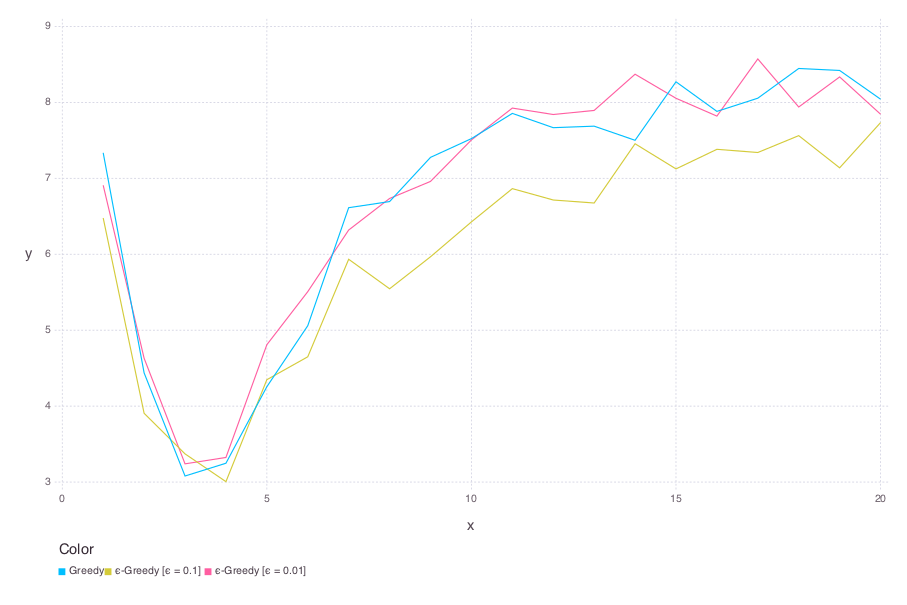

In [17]:
g = rplot(20)

In [18]:
draw(PNG("epsilon-greedy.png", 24cm, 16cm), g)